In [1]:
from sklearn.datasets import fetch_openml
dataset=fetch_openml('mnist_784',as_frame=False)

In [2]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
dataset.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
dataset.data.shape

(70000, 784)

In [5]:
dataset.target.shape

(70000,)

In [6]:
x=dataset.data
y=dataset.target

In [7]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
import matplotlib.pyplot as mp

In [9]:
type(dataset.data)

numpy.ndarray

In [10]:
type(x)

numpy.ndarray

In [11]:
type(dataset.target)

numpy.ndarray

In [12]:
type(y)

numpy.ndarray

In [13]:
type(x[0])

numpy.ndarray

In [14]:
type(y[0])

str

In [15]:
y[0:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [16]:
len(x[0])

784

In [17]:
len(y[0])

1

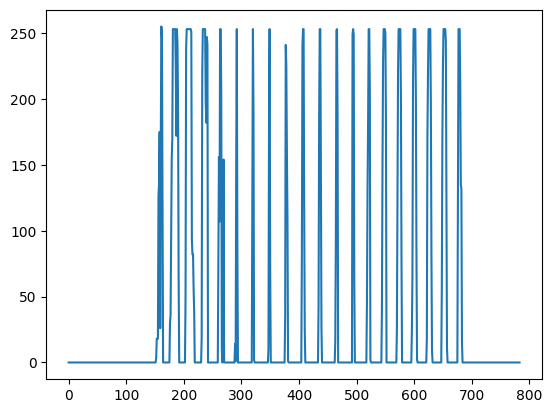

In [18]:
mp.plot(x[0])
mp.show()

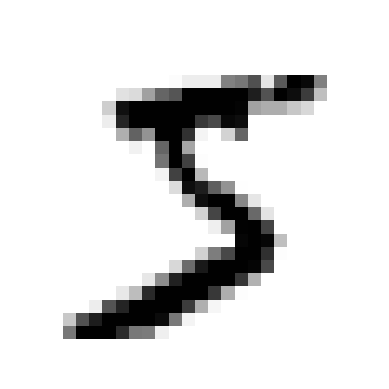

In [19]:
mp.imshow(x[0].reshape(28,28),cmap='binary')
mp.axis('off')
mp.show()

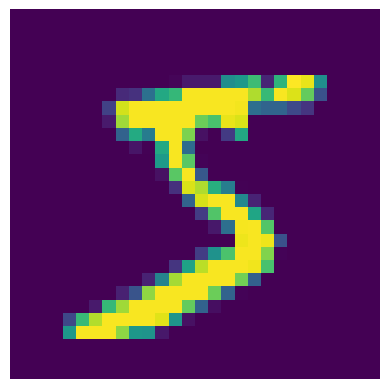

In [20]:
mp.imshow(x[0].reshape(28,28))
mp.axis('off')
mp.show()

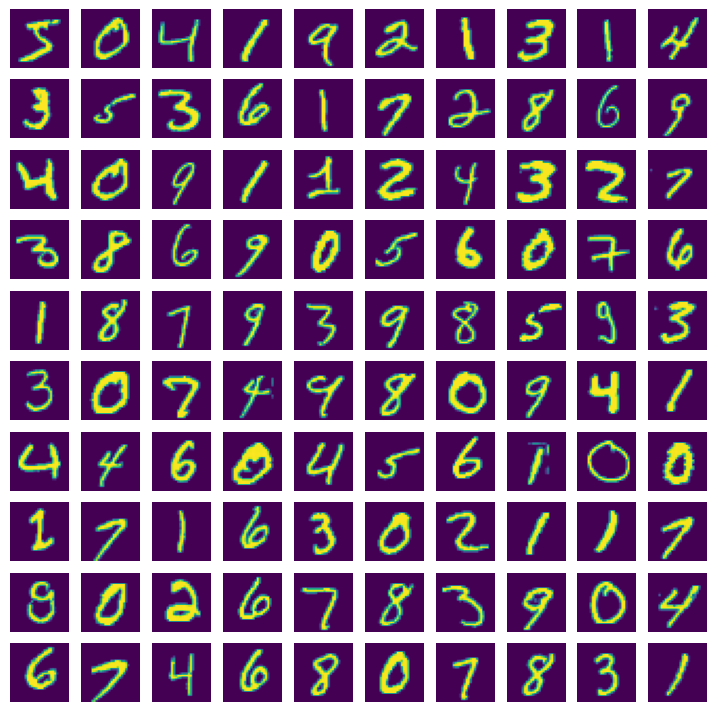

In [21]:
mp.figure(figsize=(9,9))
for i,d in enumerate(x[:100]):
    mp.subplot(10,10,i+1)
    mp.imshow(d.reshape(28,28))
    mp.axis('off')
mp.show()

In [22]:
x.dtype,y.dtype

(dtype('int64'), dtype('O'))

In [23]:
y=y.astype(int)

In [24]:
y.dtype

dtype('int64')

In [25]:
y[0]

np.int64(5)

In [26]:
x_train=x[0:60000]
y_train=y[0:60000]
x_test=x[60000:70000]
y_test=y[60000:70000]

In [27]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

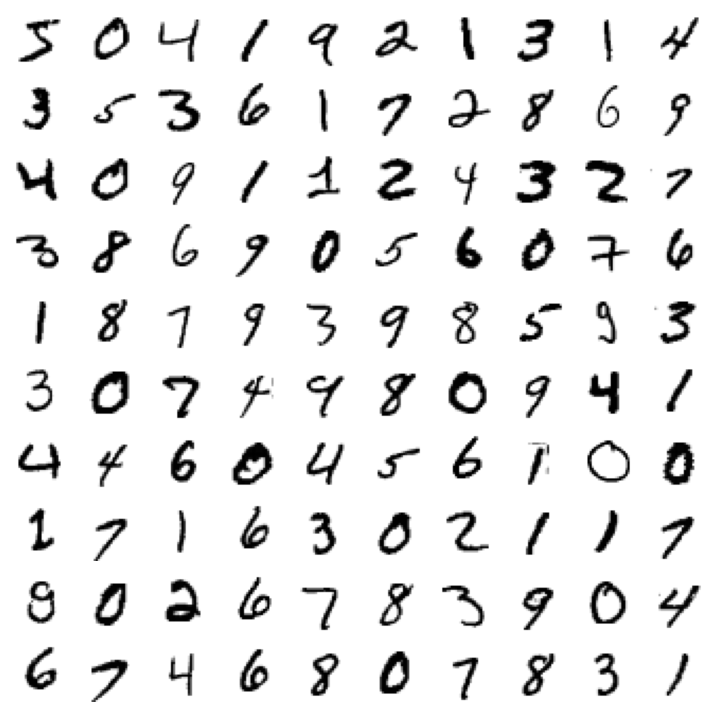

In [28]:
mp.figure(figsize=(9,9))
for i,d in enumerate(x[:100]):
    mp.subplot(10,10,i+1)
    mp.imshow(d.reshape(28,28),cmap='binary')
    mp.axis('off')
mp.show()

In [29]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [30]:
y_train_5[:5]

array([ True, False, False, False, False])

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9])

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
model=SGDClassifier(random_state=42)

In [34]:
model.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [35]:
model.predict([x_train[0]])

array([ True])

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(model.predict(x_train),y_train_5)

array([[52316,   601],
       [ 2263,  4820]])

In [39]:
confusion_matrix(model.predict(x_test),y_test_5)

array([[8707,  107],
       [ 401,  785]])

In [40]:
from sklearn.metrics import recall_score

In [41]:
recall_score(model.predict(x_train),y_train_5)

0.6805026118876183

In [42]:
recall_score(model.predict(x_test),y_test_5)

0.6618887015177066

In [43]:
y_scores=model.decision_function([x[0]])
y_scores

array([2164.22030239])

In [44]:
threshold=0
y_new_pred=(y_scores>threshold)

In [45]:
y_train_0=(y_train==0)
y_test_0=(y_test==0)

In [46]:
from sklearn.metrics import f1_score
f1_score(y_train_5,model.predict(x_train))

0.7709532949456174

In [47]:
f1_score(y_test_5,model.predict(x_test))

0.7555341674687199

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,model.predict(x_train))

np.float64(0.9238360061393824)

In [49]:
roc_auc_score(y_test_5,model.predict(x_test))

np.float64(0.918008807119745)

In [50]:
# EXERCISE 1A

In [51]:
y_train_0[:0]

array([], dtype=bool)

In [52]:
y_train[:0]

array([], dtype=int64)

In [53]:
model=SGDClassifier(random_state=42)

In [54]:
model.fit(x_train,y_train_0)

SGDClassifier(random_state=42)

In [55]:
# 1B

In [56]:
cross_val_score(model,x_train,y_train_0,cv=3,scoring='accuracy')

array([0.9854, 0.9847, 0.9865])

In [57]:
# 1C

In [58]:
from sklearn.metrics import f1_score
f1_score(y_train_0,model.predict(x_train))

0.9575554625366262

In [59]:
f1_score(y_test_0,model.predict(x_test))

0.9466800804828974

In [60]:
y_new_pred

array([ True])

In [106]:
threshold=3000
y_new_pred=(y_scores>threshold)
y_new_pred

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [109]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(model,x_train,y_train_5,cv=3,method="decision_function")

In [110]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [111]:
y_train_5[:5]

array([ True, False, False, False, False])

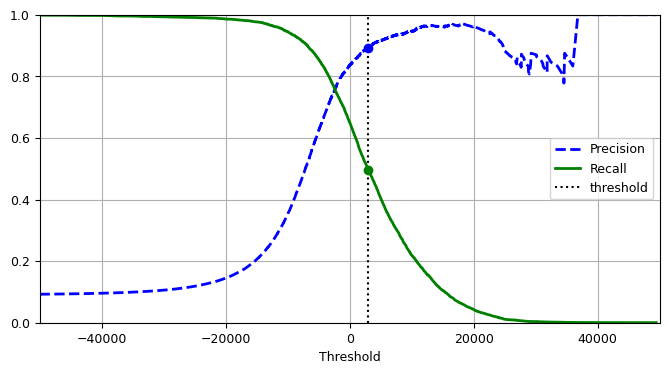

In [112]:
mp.figure(figsize=(8,4))
mp.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
mp.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
mp.vlines(threshold,0,1.0,"k","dotted",label="threshold")
idx=(thresholds>=threshold).argmax()
mp.plot(thresholds[idx],precisions[idx],"bo")
mp.plot(thresholds[idx],recalls[idx],"go")
mp.axis([-50000,50000,0,1])
mp.grid()
mp.xlabel("Threshold")
mp.legend(loc="center right")

In [113]:
model_mc=SGDClassifier(random_state=42)

In [114]:
model_mc.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [115]:
f1_score(y_train,model_mc.predict(x_train),average='micro')

0.8807666666666667

In [116]:
f1_score(y_train,model_mc.predict(x_train),average='macro')

0.8815035770572374

In [117]:
f1_score(y_test,model_mc.predict(x_test),average='micro')

0.874

In [118]:
f1_score(y_test,model_mc.predict(x_test),average='macro')

0.8749260091812581

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model_mc.predict(x_train)),accuracy_score(y_test,model_mc.predict(x_test))

(0.8807666666666667, 0.874)

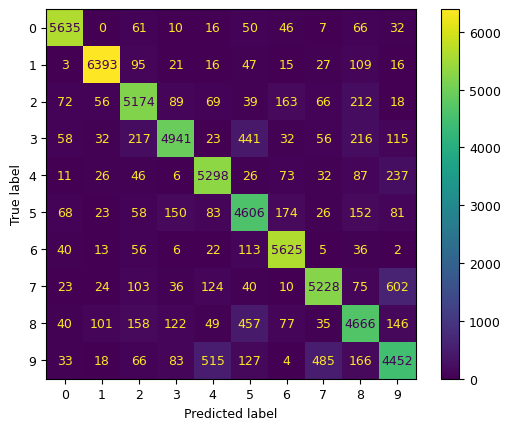

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(model_mc,x_train,y_train,cv=3)
mp.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
mp.show()

In [121]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [122]:
accuracy_score(y_train,ovr_clf.predict(x_train)),accuracy_score(y_test,ovr_clf.predict(x_test))

(0.9229166666666667, 0.9256)

In [123]:
import numpy as n
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=n.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [124]:
accuracy_score(y_multilabel,knn_clf.predict(x_train))

0.9856666666666667

In [125]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

In [126]:
sgd_clf=SGDClassifier(random_state=42)
from sklearn.multioutput import MultiOutputClassifier
multi_target_clf=MultiOutputClassifier(sgd_clf,n_jobs=-1)
multi_target_clf.fit(x_train,y_multilabel)
y_pred=multi_target_clf.predict(x_train)
accuracy=accuracy_score(y_multilabel,y_pred)
print(f"Accuracy:{accuracy:4f}")

Accuracy:0.795917


In [127]:
multi_target_clf.estimators_

[SGDClassifier(random_state=42), SGDClassifier(random_state=42)]

In [128]:
n.random.seed(42)
noise=n.random.randint(0,100,(len(x_train),784))
x_train_mod=x_train+noise
noise=n.random.randint(0,100,(len(x_test),784))
x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test

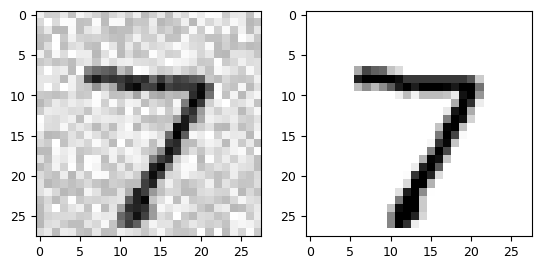

In [129]:
mp.subplot(121);
mp.imshow(x_test_mod[0].reshape(28,28),cmap='binary')
mp.subplot(122);
mp.imshow(y_test_mod[0].reshape(28,28),cmap='binary')

In [130]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit=knn_clf.predict([x_test_mod[0]])

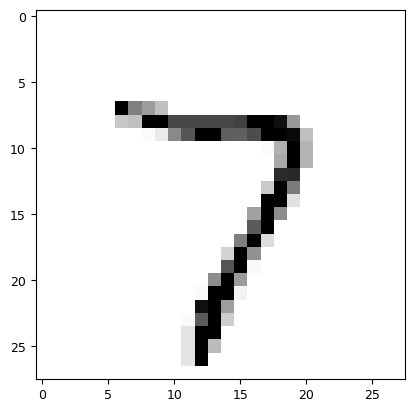

In [131]:
mp.imshow(clean_digit.reshape(28,28),cmap='binary')